In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bs_path = "../datasets/GHUNBuenosAires_process.txt"
cine_path = "../datasets/GHUNCine_process.txt"

df_bs = pd.read_csv(bs_path, sep=" ")
df_cine = pd.read_csv(cine_path, sep=" ")


### La cantidad de adultos mayores inscriptos en las distintas carreras, superando ampliamente las otras franjas etarias.

'Tabla de edades de la Universidad de Buenos Aires:'

,age_group
+ 90,0.315934
60-70,0.118132
70-80,0.093407
80-90,0.088462
30-40,0.086264


'Tabla de edades de la Universidad de Cine:'

,age_group
50-60,0.223339
+ 90,0.207705
20-30,0.093244
60-70,0.093244
30-40,0.092686


array([<AxesSubplot: ylabel='age_group'>], dtype=object)

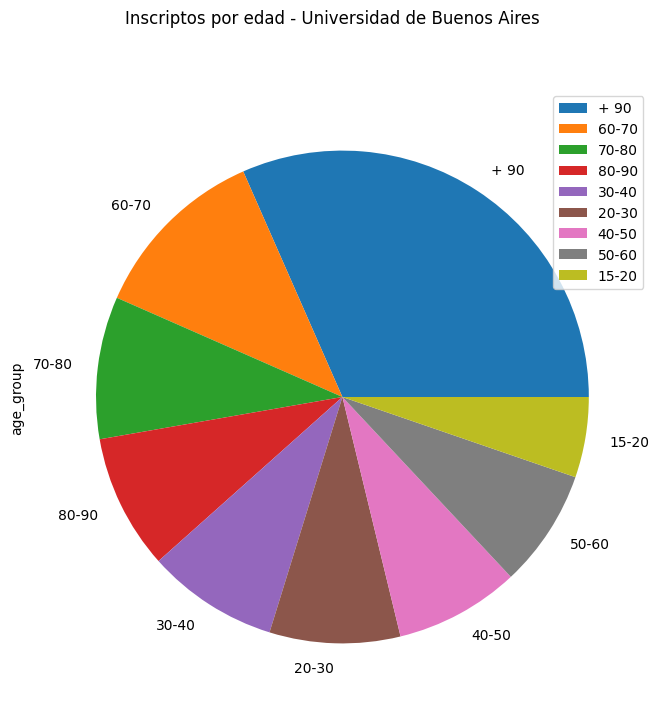

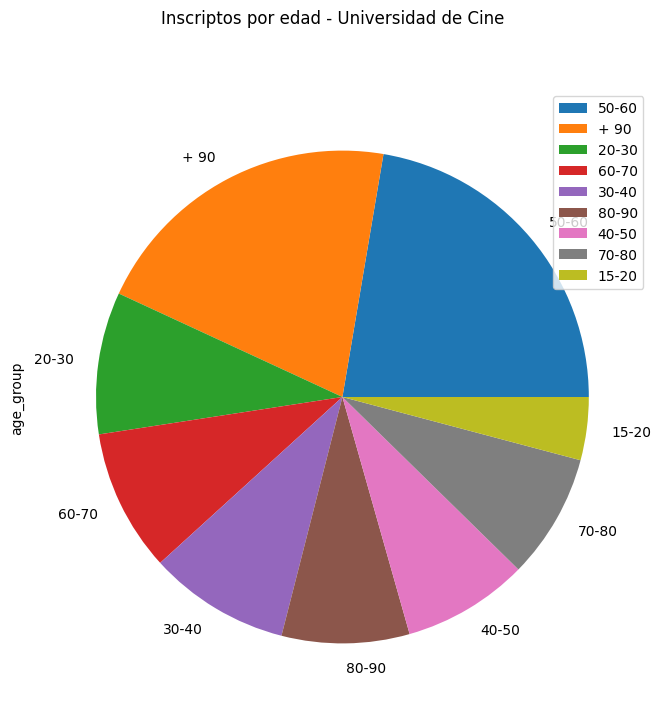

In [2]:
select = ['age','gender','location', 'career']



df_bs['age_group'] = pd.cut(df_bs['age'], bins=[15, 20, 30, 40, 50, 60, 70, 80, 90, 200], right=True, labels=['15-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '+ 90',])

bs_age_group = pd.DataFrame(df_bs['age_group'].value_counts('career'))

display('Tabla de edades de la Universidad de Buenos Aires:')
display(bs_age_group.head())

bs_age_group.plot(kind='pie', subplots=True,title="Inscriptos por edad - Universidad de Buenos Aires", figsize=(8,8))


df_cine['age_group'] = pd.cut(df_cine['age'], bins=[15, 20, 30, 40, 50, 60, 70, 80, 90, 200], right=True, labels=['15-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '+ 90',])

cine_age_group = pd.DataFrame(df_cine['age_group'].value_counts('career'))

display('Tabla de edades de la Universidad de Cine:')
display(cine_age_group.head())

cine_age_group.plot(kind='pie',subplots=True,title="Inscriptos por edad - Universidad de Cine", figsize=(8,8))


In [3]:
carreras = df_bs[['age','career','gender', 'location']]
bs_carreras_menores_50 = carreras.query("age <= 50")
bs_carreras_mayores_50 = carreras.query("age >= 50")





### Tanto en la Universidad de Buenos Aires, como en la universidad de Cine, el numero de inscriptos mayores a 65 superan en numero a los menores en todas las carreras.

In [4]:
# Funciones para crear los siguientes graficos y tablas:

def frec_generator(df, column):
    frec_df = pd.value_counts(df[column])
    frec_df = pd.DataFrame(frec_df)
    frec_df.columns = ['frec_abs']
    frec_df['frec_rel'] = 100*frec_df['frec_abs']/len(df)

    return frec_df

def frec_acum_calculate(df,column):
    frec_value = df[column].values
    acum = []
    acum_value = 0

    for i in frec_value:
        acum_value = acum_value + i
        acum.append(acum_value)
    df['frec_rel_acum'] = acum

    return df


def bar_generator(df, title, column):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title(title)
    ax.bar(df.index, df[column])
    ax.set_xticklabels(df.index, rotation=90)

    return plt.show()


/tmp/ipykernel_5559/1563741163.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.index, rotation=90)


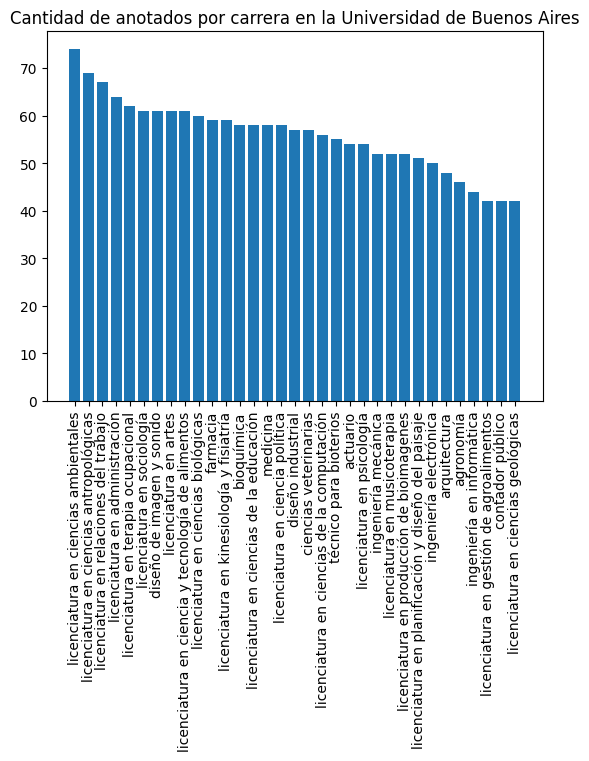

/tmp/ipykernel_5559/1563741163.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.index, rotation=90)


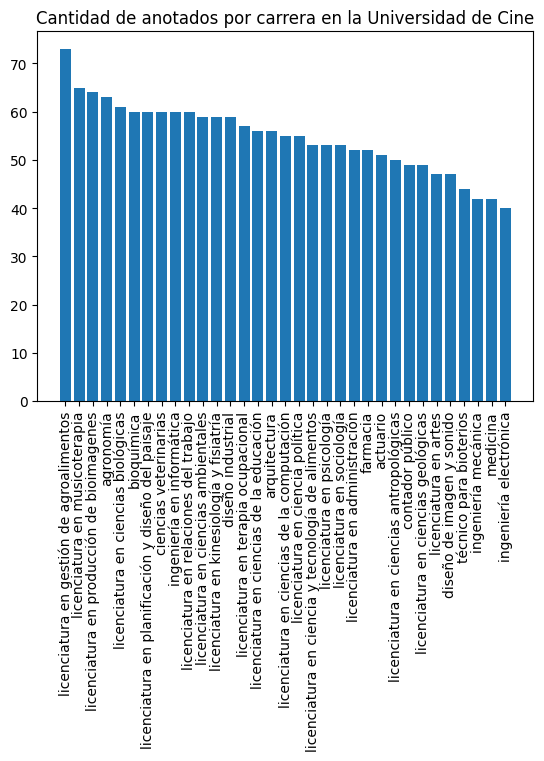

In [5]:
df_careers_bs = frec_generator(df_bs,'career')

bar_generator(df_careers_bs,
            "Cantidad de anotados por carrera en la Universidad de Buenos Aires",
            'frec_abs')

df_careers_cine = frec_generator(df_cine,'career')

bar_generator(df_careers_cine,
            "Cantidad de anotados por carrera en la Universidad de Cine",
            'frec_abs')




'Tabla de personas mayores a 65 años anotadas en las distintas carreras.'

,frec_abs,frec_rel
licenciatura en terapia ocupacional,45,4.257332
licenciatura en ciencias antropológicas,41,3.878903
licenciatura en ciencias ambientales,40,3.784295
medicina,38,3.595080
ciencias veterinarias,38,3.595080


/tmp/ipykernel_5559/1563741163.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.index, rotation=90)


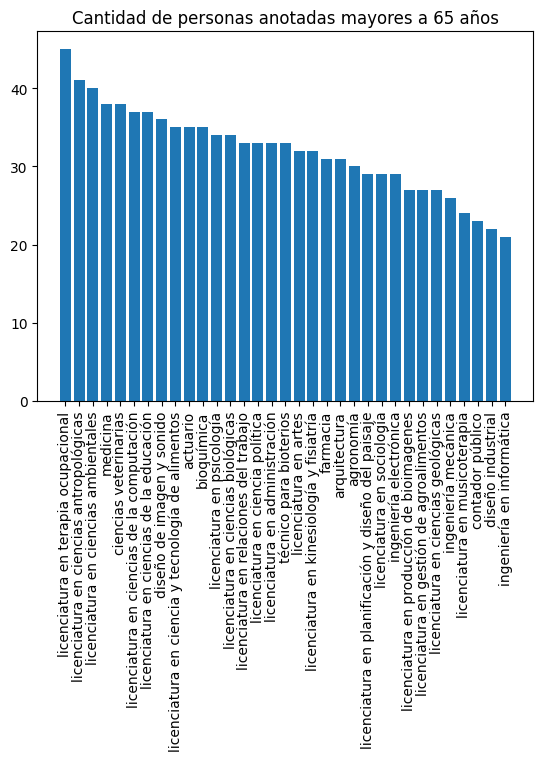

'Tabla de personas mayores a 65 años anotadas en las distintas carreras.'

,frec_abs,frec_rel
diseño industrial,35,4.447268
licenciatura en relaciones del trabajo,34,4.320203
licenciatura en ciencias ambientales,34,4.320203
licenciatura en sociología,32,4.066074
licenciatura en administración,31,3.939009


/tmp/ipykernel_5559/1563741163.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.index, rotation=90)


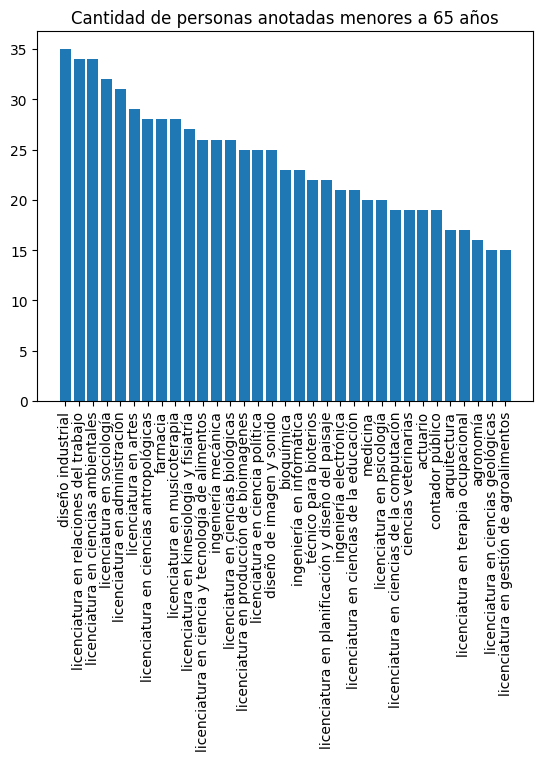

In [6]:
carreras = df_bs[['age','career','gender', 'location']]

bs_carreras_menores_65 = carreras.query("age < 65")
bs_carreras_mayores_65 = carreras.query("age >= 65")

carreras_mayores_65 = frec_generator(bs_carreras_mayores_65,'career')
carreras_menores_65 = frec_generator(bs_carreras_menores_65,'career')

display("Tabla de personas mayores a 65 años anotadas en las distintas carreras.")
display(carreras_mayores_65.head())

bar_generator(carreras_mayores_65,
            "Cantidad de personas anotadas mayores a 65 años",
            'frec_abs')


display("Tabla de personas mayores a 65 años anotadas en las distintas carreras.")
display(carreras_menores_65.head())

bar_generator(carreras_menores_65,
            "Cantidad de personas anotadas menores a 65 años",
            'frec_abs')





### Como se puede apreciar en los siguientes graficos, la cantidad de inscriptos mayores a 65 años, ronda aproximandamente en un 60% sobre el total.

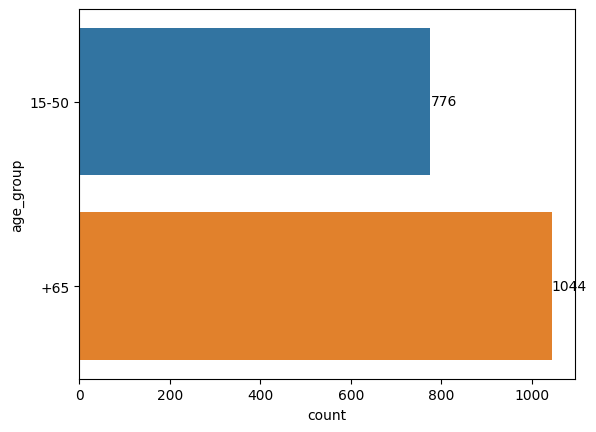

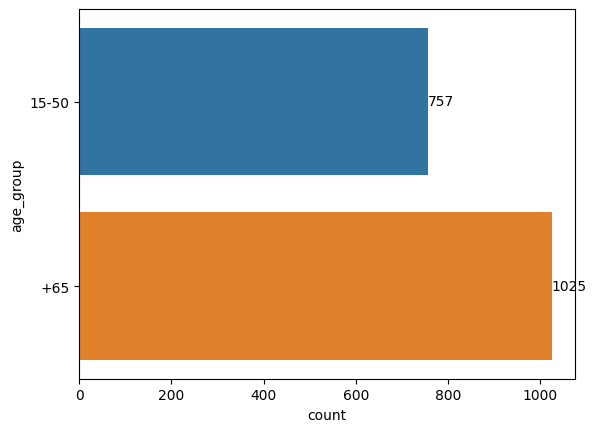

In [7]:
select = ['age','gender','location', 'career']



df_bs['age_group'] = pd.cut(df_bs['age'], bins=[15,65,200], right=True, labels=['15-50', '+65'])

ax = sns.countplot(data=df_bs, y='age_group')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

df_cine['age_group'] = pd.cut(df_bs['age'], bins=[15,65,200], right=True, labels=['15-50', '+65'])

ax = sns.countplot(data=df_cine, y='age_group')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

In [9]:

def frec_acum_calculate(df,column):
    frec_value = df[column].values

    acum = []
    acum_value = 0

    for i in frec_value:
        acum_value = acum_value + i
        acum.append(acum_value)

    df['frec_rel_acum'] = acum

    return df

frec_acum_calculate(df_careers_bs,'frec_rel')

,frec_abs,frec_rel,frec_rel_acum
licenciatura en ciencias ambientales,74,4.013015,4.013015
licenciatura en ciencias antropológicas,69,3.741866,7.754881
licenciatura en relaciones del trabajo,67,3.633406,11.388286
licenciatura en administración,64,3.470716,14.859002
licenciatura en terapia ocupacional,62,3.362256,18.221258
licenciatura en sociología,61,3.308026,21.529284
diseño de imagen y sonido,61,3.308026,24.837310
licenciatura en artes,61,3.308026,28.145336
licenciatura en ciencia y tecnología de alimentos,61,3.308026,31.453362
licenciatura en ciencias biológicas,60,3.253796,34.707158
